# Berlian Muhammad G. A
# 1301204378
# IF-44-10

**CASE BASED 02**
**UNSUPERVISED LEARNING**

---

COUNTRY DATA (NIM GENAP)

Mengelompokkan Negara dengan Menggunakan UNSUPERVISED LEARNING untuk mengkategorikan negara menggunakan faktor sosial-ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

**KETERANGAN ATRIBUT**

```
country    : Nama negara

child_mort : Kematian anak di bawah usia 5 tahun per 1000 kelahiran hidup

exports    : Ekspor barang dan jasa per kapita. Diberikan sebagai % dari usia PDB per kapita

health     : Total pengeluaran kesehatan per kapita. Diberikan sebagai % dari usia PDB per kapita

imports    : Impor barang dan jasa per kapita. Diberikan sebagai % dari usia PDB per kapita

income     : Pendapatan bersih per orang

inflation  : Ukuran tingkat pertumbuhan tahunan Total PDB

life_expect: Jumlah rata-rata tahun hidup seorang anak yang baru lahir jika pola kematian saat ini tetap sama

total_fer  : Jumlah anak yang akan dimiliki setiap wanita jika tingkat kesuburan usia saat ini tetap sama

gdpp       : PDB per kapita. Dihitung sebagai Total PDB dibagi dengan total populasi
```



In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import pack untuk ignoring warning
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#import dataset
#uploading file dataset

from google.colab import files
uploaded = files.upload()

Saving Country-data.csv to Country-data (2).csv


In [ ]:
#converting dataframe

dataset = pd.read_csv("Country-data.csv")
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
dataset.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
dataset.shape

(167, 10)

In [ ]:
#mendeteksi missing value

dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
#mengecek duplikasi data

dataset.duplicated().sum()

0

In [ ]:
#INDEXING
#mengkonversi kolom country dari object menjadi index

dataset['country'].nunique()
dataset.set_index('country', inplace=True)
dataset

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


# **VISUALISASI DATASET**

In [ ]:
# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import plotly untuk grafik
import plotly
import plotly.express as px

**PERSEBARAN DATA**

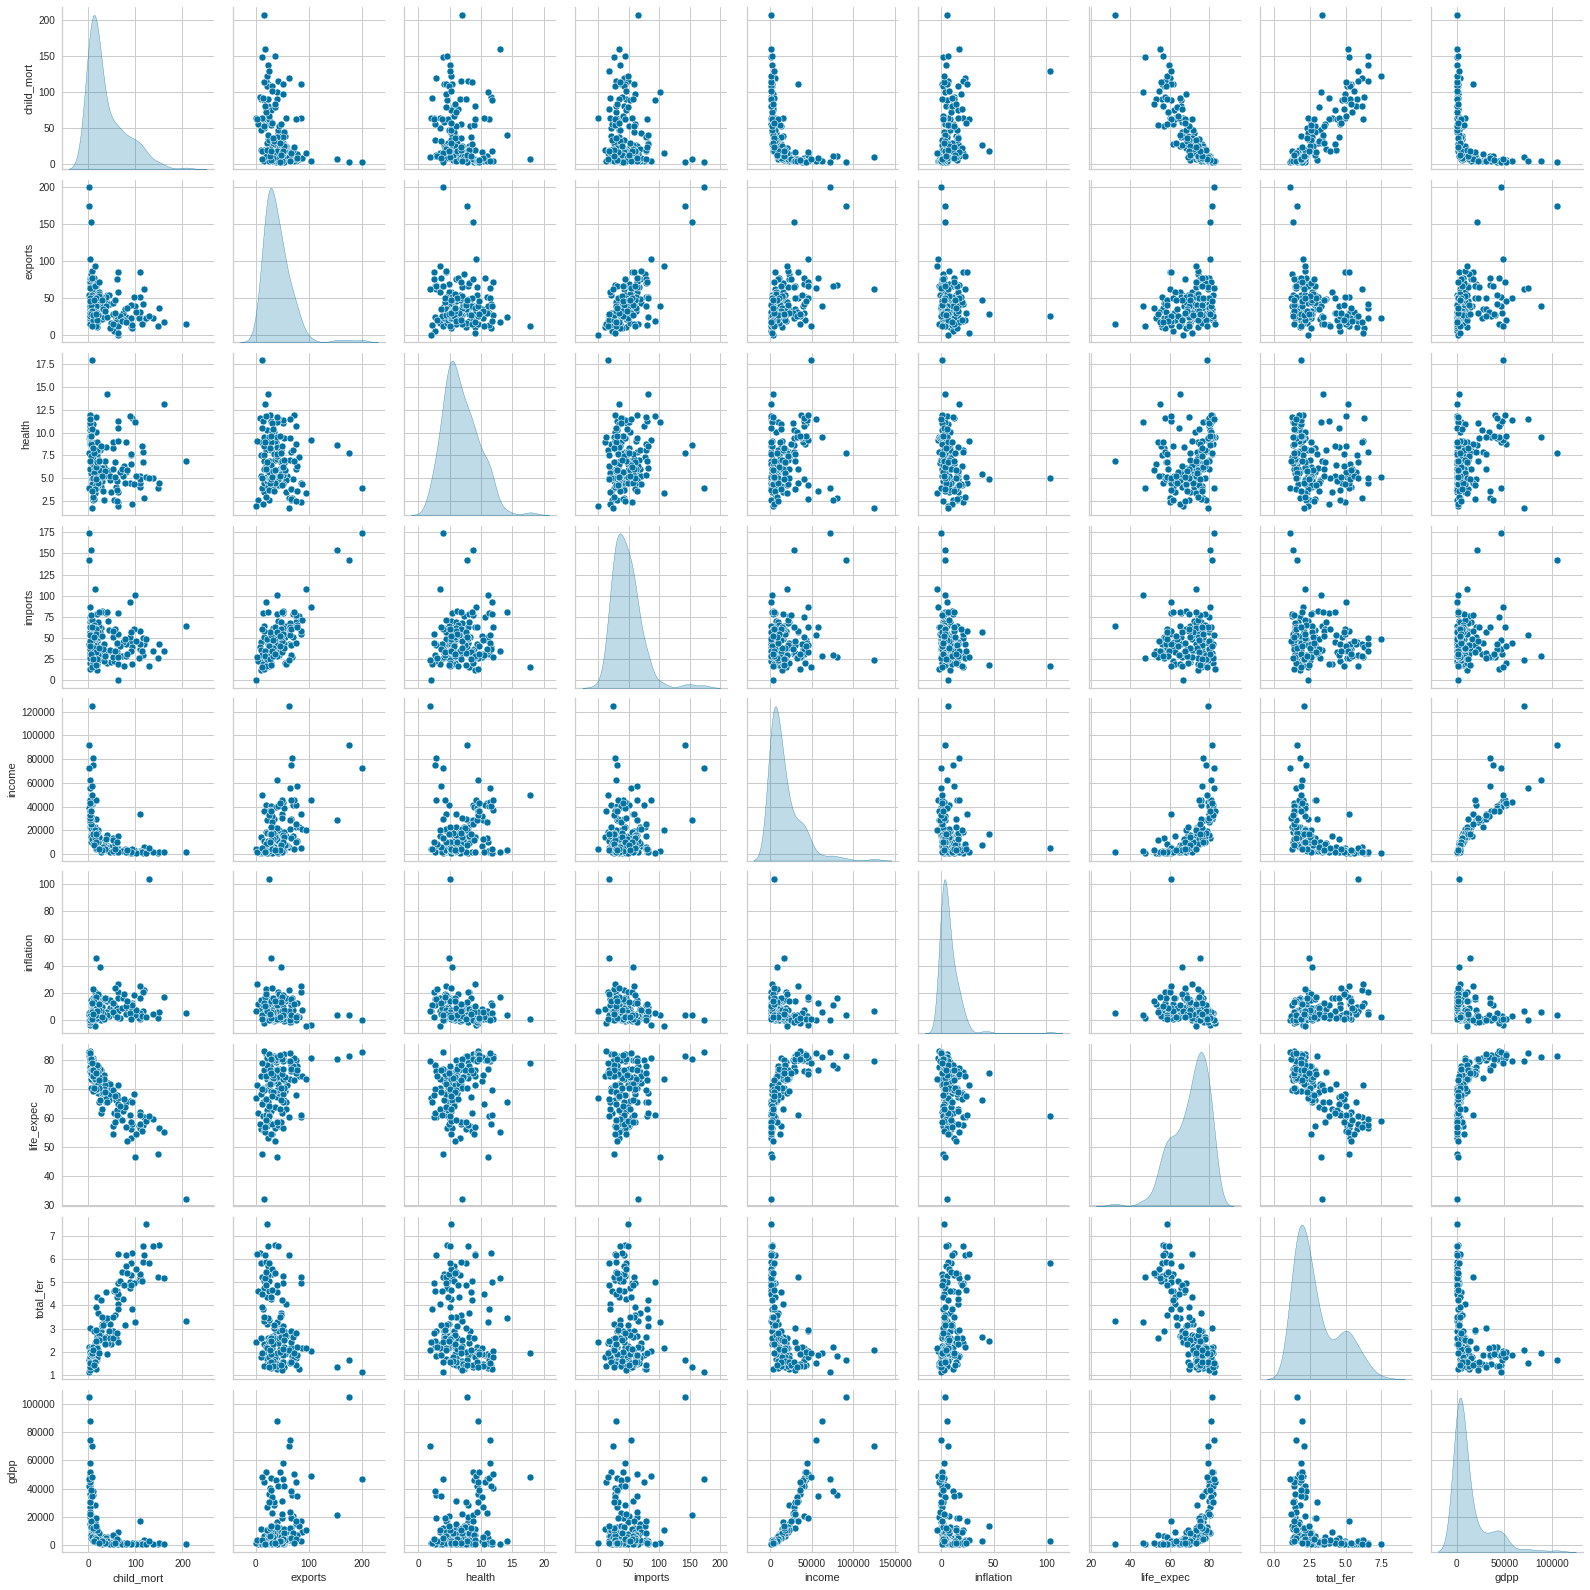

In [ ]:
#visualisasi

sns.pairplot(data=dataset,diag_kind='kde')
plt.show()

**DETEKSI DATA PENCILAN (OUTLIERS)**

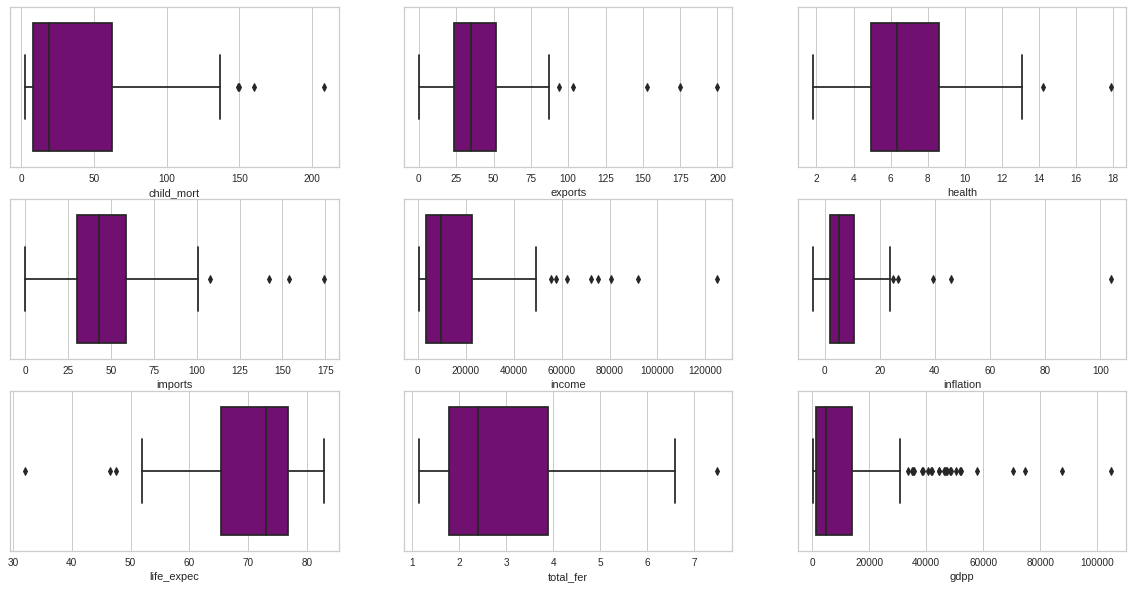

In [ ]:
#boxplot data pencilan

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 10))

for variable, subplot in zip(dataset.columns, ax.flatten()):
      sns.boxplot(dataset[variable], ax = subplot, color='purple')
plt.show()

**KORELASI**

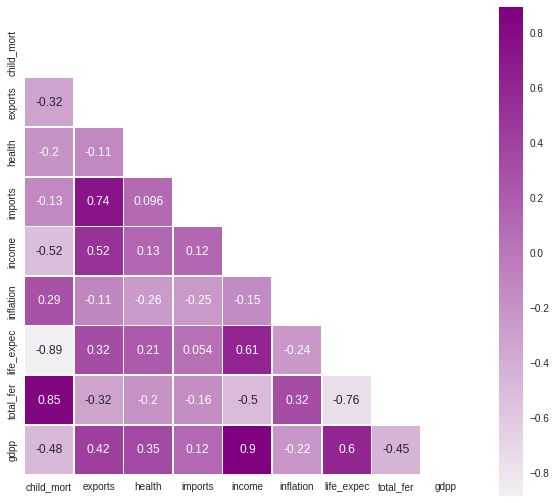

In [ ]:
#korelasi data

corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.light_palette('purple', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, 
            linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

In [ ]:
dataset.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


# **STANDARISASI DATASET**

Scalling data diperlukan untuk algoritma yang didasarkan pada jarak seperti K-means dan Hierarchical clustering.

StandardScaler mengubah data sedemikian rupa sehingga rata-rata menjadi 0 dan varian menjadi 1.

In [ ]:
#import untuk preprosesing
from sklearn.preprocessing import StandardScaler

#standarisasi

ss = StandardScaler()

scaled_df = ss.fit_transform(dataset)
X = pd.DataFrame(scaled_df, columns=dataset.columns, index = dataset.index)

X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# **Principal Component Analysis**

Principal Component Analysis (PCA) adalah salah satu metode reduksi dimensi pada ML. PCA akan memilih variabel-variabel yang mampu menjelaskan sebagian besar variabilitas data.

Metoda PCA digunakan jika data yang ada memiliki jumlah variabel yang besar dan memiliki korelasi antar variabelnya. Perhitungan dari principal component analysis didasarkan pada perhitungan nilai eigen dan vektor eigen yang menyatakan penyebaran data dari suatu dataset.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pcdata = pca.fit_transform(X)

In [ ]:
pca_df = pd.DataFrame(pcdata)
pca_df.head()

,0,1,2,3,4,5,6,7,8
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270


In [ ]:
y = np.cumsum(pca.explained_variance_ratio_)
y

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

In [ ]:
mypca = PCA(n_components=2)
pca5 = mypca.fit_transform(X)
pca5_df = pd.DataFrame(pca5, index=dataset.index)
pca5_df

,0,1
country,,
Afghanistan,-2.913025,0.095621
Albania,0.429911,-0.588156
Algeria,-0.285225,-0.455174
Angola,-2.932423,1.695555
Antigua and Barbuda,1.033576,0.136659
...,...,...
Vanuatu,-0.820631,0.639570
Venezuela,-0.551036,-1.233886
Vietnam,0.498524,1.390744


# **ELBOW METHOD**

Elbow method adalah metoda yang sering dipakai untuk menentukan jumlah cluster.

• Semakin banyak cluster, Sum-Square-Error semakin rendah

• Memilih jumlah minimum cluster

**ketika SSE mulai naik level**

• Gunakan Cross Validation dan rata-rata SSE setiap fold

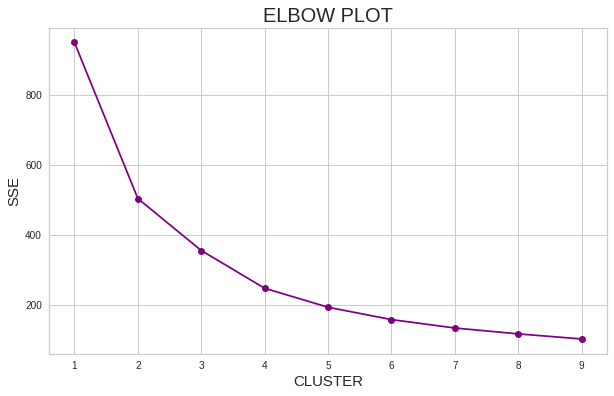

In [ ]:
#ELBOW PLOT

from sklearn.cluster import KMeans

elbow = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state = 10)
    kmeans.fit(pca5_df)
    elbow.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10), elbow, marker="o", color="purple")
plt.title('ELBOW PLOT', fontsize = 20)
plt.xlabel('CLUSTER', fontsize = 15)
plt.ylabel('SSE', fontsize = 15)
plt.grid(True)
plt.show()

# **HIERARCHICAL CLUSTERING**

Hierarchical Clustering adalah algoritma yang mengelompokkan objek serupa ke dalam kelompok yang disebut cluster. Titik akhir adalah kumpulan cluster, di mana setiap cluster berbeda satu sama lain, dan objek dalam setiap cluster secara umum mirip satu sama lain.

Dalam metode ini, setiap titik data dianggap sebagai satu cluster dan cluster ini dikelompokkan untuk membentuk cluster yang lebih besar dan akhirnya cluster tunggal dari semua pengamatan dibuat.

**(Bottom-Up)**

**Membangun Model :**
Untuk menemukan jumlah cluster yang optimal dengan Dendrogram dan Metode Skor Silhouette.

Pertama, mencari matriks keterkaitan yang mewakili jarak antara cluster berdasarkan metode keterkaitan yang diberikan. Ada beberapa metode linkage seperti **single, complete, average, centroid, dan ward.**

**Memutuskan metode tautan mana yang terbaik :**
Untuk menentukan metode hubungan terbaik dengan menggunakan **koefisien kofenet.** Koefisien kofenet dengan nilai tertinggi merupakan keterkaitan terbaik.

In [ ]:
#import library untuk clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,silhouette_samples,accuracy_score
from scipy.cluster.hierarchy import  dendrogram, cophenet, linkage
from scipy.spatial.distance import pdist

#mencari keterkaitan data dengan 5 metode

methods = ['single','complete','average','ward','centroid']

for i in methods:
    link = linkage(X, method=i)
    coeff, cophenet_dist = cophenet(link, pdist(X))
    print('Koefisien Cophenet untuk', i, ':', coeff)

Koefisien Cophenet untuk single : 0.7604287846523685
Koefisien Cophenet untuk complete : 0.490896504155209
Koefisien Cophenet untuk average : 0.8394248289254103
Koefisien Cophenet untuk ward : 0.52902912158488
Koefisien Cophenet untuk centroid : 0.831962758604513


**DENDOGRAM SINGLE LINKAGE**

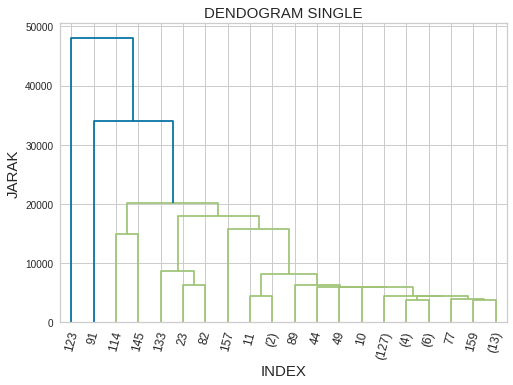

In [ ]:
#dendogram single linkage (keterkaitan single)

plt.title('DENDOGRAM SINGLE', fontsize = 15)
plt.xlabel('INDEX', fontsize = 15)
plt.ylabel('JARAK', fontsize = 15)

link=linkage(dataset, method='single')
dendrogram(link, leaf_rotation=75., truncate_mode='lastp', p=20)

plt.show()

**DENDOGRAM COMPLETE LINKAGE**

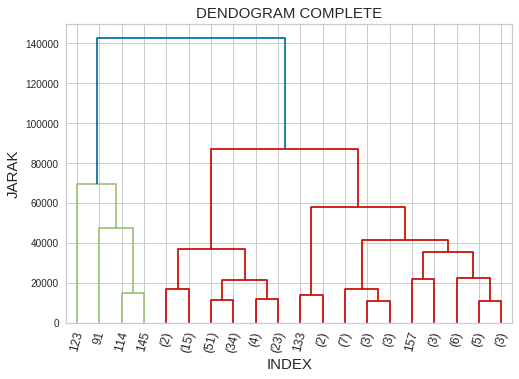

In [ ]:
#dendogram complete linkage (keterkaitan complete)

plt.title('DENDOGRAM COMPLETE', fontsize = 15)
plt.xlabel('INDEX', fontsize = 15)
plt.ylabel('JARAK', fontsize = 15)

link=linkage(dataset, method='complete')
dendrogram(link, leaf_rotation=75., truncate_mode='lastp', p=20)

plt.show()

**DENDOGRAM AVERAGE LINKAGE**

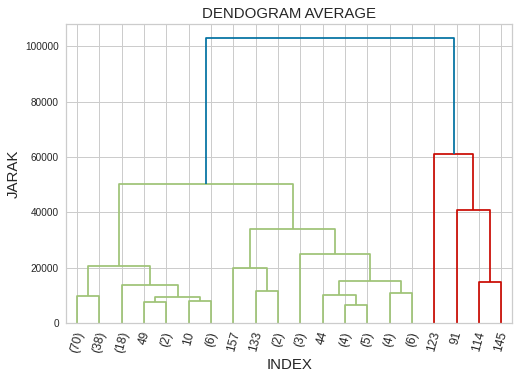

In [ ]:
#dendogram average linkage (keterkaitan rata-rata)

plt.title('DENDOGRAM AVERAGE', fontsize = 15)
plt.xlabel('INDEX', fontsize = 15)
plt.ylabel('JARAK', fontsize = 15)

link=linkage(dataset, method='average')
dendrogram(link, leaf_rotation=75., truncate_mode='lastp', p=20)

plt.show()

**DENDOGRAM CENTROID LINKAGE**

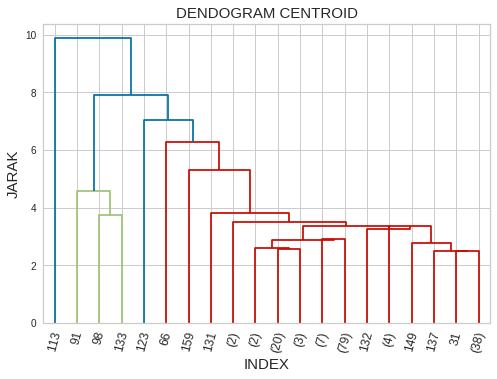

In [ ]:
#dendogram centroid linkage (keterkaitan centroid)

plt.title('DENDOGRAM CENTROID', fontsize = 15)
plt.xlabel('INDEX', fontsize = 15)
plt.ylabel('JARAK', fontsize = 15)

link=linkage(X, method='centroid')
dendrogram(link, leaf_rotation=75., truncate_mode='lastp', p=20)

plt.axhline(y=18, c='red', ls='--')
plt.show()

**DENDOGRAM WARD LINKAGE**

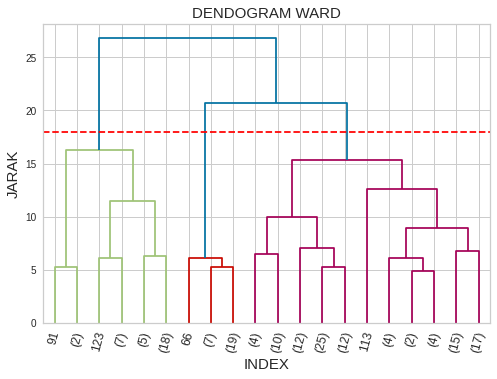

In [ ]:
#dendogram ward linkage (keterkaitan ward)

plt.title('DENDOGRAM WARD', fontsize = 15)
plt.xlabel('INDEX', fontsize = 15)
plt.ylabel('JARAK', fontsize = 15)

link=linkage(X, method='ward')
dendrogram(link, leaf_rotation=75., truncate_mode='lastp', p=20)

plt.axhline(y=18, c='red', ls='--')
plt.show()

Dari semua dendrogram plotting linkage ward mampu mengelompokkan data dengan jelas. Jadi, saya mempertimbangkan ward linkage sebagai metode linkage terbaik.

**SKOR SILHOUETTE**

In [ ]:
#mencari skor silhouette

n_cluster = [2,3,4,5]

for K in n_cluster:
    siluet  = AgglomerativeClustering(n_clusters=K)
    predict = siluet.fit_predict(X)
    s_score = silhouette_score(dataset,predict,random_state=10)
    print("Untuk Cluster {} skor silhouettenya : {}".format(K, s_score) )

Untuk Cluster 2 skor silhouettenya : 0.7040968796654424
Untuk Cluster 3 skor silhouettenya : 0.17256555742114882
Untuk Cluster 4 skor silhouettenya : 0.1503417991741312
Untuk Cluster 5 skor silhouettenya : 0.03926320584377816


Dari output di atas untuk 2 cluster skor silhouette terbaik yaitu 0,70.

Jadi, untuk cluster = 2 adalah **cluster terbaik**.

In [ ]:
#membangun model dengan k = 2
agglo_clust = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo_clust.fit(X)

set(agglo_clust.labels_)

{0, 1}

In [ ]:
country_agglo_df = dataset.copy()
country_agglo_df['clusters'] = agglo_clust.labels_
country_agglo_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0


# **ANALISIS**

In [ ]:
country_agglo_df['clusters'].value_counts()

0    133
1     34
Name: clusters, dtype: int64

In [ ]:
#analisis hierarchial clustering

country_agglo_df.groupby(["clusters"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,46.529323,36.660895,6.384812,46.375683,9362.127820,8.71909,68.145865,3.218797,5242.210526
1,5.961765,58.508824,8.501176,48.902941,47588.235294,4.11550,79.982353,1.888529,43170.588235


**KESIMPULAN**

Cluster 0 = negara berkembang

Cluster 1 = negara maju


**DENGAN HASIL CLUSTERING**

Jumlah negara maju 34

Jumlah negara berkembang 133


# **HASIL ANALISIS**

In [ ]:
# List negara berkembang
n_berkembang=country_agglo_df[country_agglo_df['clusters']==0]
n_berkembang.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh',
       ...
       'Turkmenistan', 'Uganda', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia'],
      dtype='object', name='country', length=133)

In [ ]:
# List negara maju
n_maju=country_agglo_df[country_agglo_df['clusters']==1]
n_maju.index

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya', 'Luxembourg',
       'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal',
       'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype='object', name='country')

**VISUALISASI**

In [ ]:
from plotly.offline import iplot
import plotly.graph_objects as go


fig_cases = go.Figure(data = go.Choropleth(locations = country_agglo_df.index,
                                     z = country_agglo_df['clusters'],
                                     locationmode = 'country names',
                                     colorscale = [[0, 'teal'],[0.5, 'green'],[1, 'gold']],
                                     colorbar = {'title':'CLUSTER'},
                                     colorbar_title = "CLUSTER"))

fig_cases.update_layout(
                       title_text='GRAFIK GEOGRAFIS UNTUK 167 NEGARA DI DUNIA',
                       geo = dict(showframe = True,showcoastlines = False)
                       )

iplot(fig_cases)

Ada 133 negara di Cluster 0 berwarna hijau (ditandai dengan menunjukkan nilai rata-rata menuju negatif untuk semua fitur jika dibandingkan dengan Cluster 1) yang berlokasi hampir di seluruh Amerika Selatan, sebagian Afrika, Eropa, dan Asia.

Ada 34 negara di Cluster 1 berwarna kuning (ditandai dengan menunjukkan nilai-nilai positif seperti pembangunan ekonomi yang baik, harapan hidup yang tinggi, angka kematian anak yang rendah) terletak di Amerika Utara, Australia, Eropa dan beberapa di Asia.



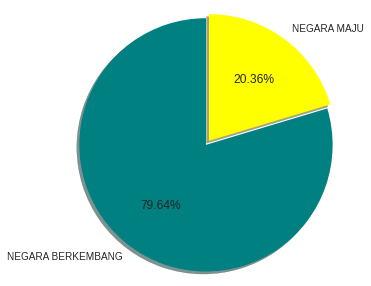

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(country_agglo_df.clusters.value_counts(), colors=['teal', 'yellow'], explode=(0.04, 0),
autopct='%1.2f%%', shadow=True, startangle=90, labels=['NEGARA BERKEMBANG','NEGARA MAJU'])

plt.axis('equal')
plt.show()